<div class="description user_content student-version enhanced"><div id="content">
<h1 class="title">Quick Reference</h1>
<div id="outline-container-orgheadline1" class="outline-2">
<div id="text-orgheadline1" class="outline-text-2">
<ul class="org-ul">
<li>Due date:&nbsp;<strong>Wednesday, October 14th</strong> by 11:59PM.</li>
<li>Submission: Submission must be made on Canvas</li>
<li>Format: Your submission will consist of two files: a Python file (or tar/zip/archive of code), and (2) a PDF file. Please upload these as two&nbsp;<strong>separate files</strong>&nbsp;– do not group both code and report into the same tar/zip/archive.</li>
</ul>
</div>
</div>
<div id="outline-container-orgheadline2" class="outline-2">
<h2 id="orgheadline2">
<span class="section-number-2"></span>Questions</h2>
<div id="text-1" class="outline-text-2">
<p title="Play media comment.">The video <a id="media_comment_maybe" class="instructure_file_link instructure_video_link" title="fiveCCC.mp4" href="/courses/25410/files/2220857/download?wrap=1">fiveCCC.mp4</a> shows a target composed of five concentric contrasting circle (CCC) features. The dimensions of the target (in inches) are shown in the figure below. The origin of the target’s coordinate system is in the middle of the rectangle, with its x-axis pointing to the right, its y-axis pointing down, and its z-axis pointing into the page.</p>
<div class="figure">
<p><img src="http://inside.mines.edu/~twilliams/courses/CV-507/hw3image0.png" alt="hw3image0.png" style="max-width: 400px;"></p>
</div>
<ol class="org-ol">
<li>Read and display each image of the video, and print the frame number on the displayed image.</li>
<li>Write a program that finds the five CCCs in each image, and also finds the correspondence between the image features and the model features.</li>
<li>Find a picture that you like and map it onto the target plane in each image, using a homography (projective transform). The picture should look like it is attached to the plane of the target.</li>
<li>Find the pose of the target with respect to the camera in each frame of the video. Draw the XYZ coordinate axes of the target as an overlay on the image, and also print the pose values on the image, in terms of translation (in inches) and the rotation vector.</li>
<li>Create an output video of your results, and post it to Google Drive.</li>
</ol>
<p>Use the following values for the camera intrinsic parameters: focal length = 531 (in pixels), image center (x,y in pixels) = (320, 240).&nbsp; Assume no lens distortion.</p>
<p>An example output image is shown below. I used an image of a dollar bill; you should use something else.</p>
<div class="figure">
<p><img src="https://elearning.mines.edu/courses/25410/files/2219531/download" alt="hw3.png"style="max-width: 643px;"></p>
</div>
<p>Turn in:</p>
<ol class="org-ol">
<li>Your program listing, with comments.</li>
<li>A PDF file containing a description of your solution and a link to your video.&nbsp;<strong>Make sure your link is accessible to others by testing it in incognito mode.</strong>
</li>
</ol>
</div>
</div>
</div></div>

<div>
    <h1>Solution</h1>
    <h2>Description</h2>
    <p>
        The program starts by applying an adaptive gaussian threshold with a block size of 9 (similar to the size in pixels of the CCC (not sure if that is a coincident, but was the threshold that worked best). Then the image and inverse image are processed with openings, closings, erosion, and dilation to maximize the targets. This process what visualized by viewing the inner and outer connected component labels. The found targets then go through the process for finding CCCs (checking centroid distance, area, etc. I also added a function to reject outlier points that didn't fit the std of the rest of the points). 5 points were detected in each frame with the current settings, so I assumed the pose would also be found in all the frames. Unfortunately, the last 4 frame before the last frame failed to find the pose which can be seen in the printed error percentage.<br><br>So once 5 points were found, these were passed to the order_targets function and then to the solvePnP function to find the pose, rotation vector and translation vector. If the pose was found, the axis and labels are drawn. Finally, the coordinates for CCC labels 0, 2, 3, and 4 were passed as bounds for the planes replacement. Given the bounds, the source image's (BK logo) perspective is warped to match the region of interest and masks are applied to replace the image in that location. Problems encountered here were when the coordinates form a diamond shape where the top and bottom points have close to the same x value or right and left have close to the same y value, the cv2 function for replacing the rectangle creates a weird visual effect because the angles are 'extreme' and the warped image doesn't understand the orientation its supposed to be placed in. The other problem I encountered was trying to rotate the image when the CCCs are rotated around the Z axis. Since I was grabbing the rotation for Z from the solvePnP function, I thought that I would be able to flip the image based off of that parameter, but the pose was so shaky around some of the flip points that the image would start flipping a bunch simply due to the instabilties and errors in each pose. I ended up removing this portion due to the flickering effect caused by the flipping. This does mean that when he turns the CCCs more that 90 degrees, the CCCs image will flip back to the upright orientation.<br><br>Lastly were all of the add ons, like drawing the frame number, labels, axis, rotation vector, and translation vector. Once those were all done, the image was saved to the output video. Voila.</p>
</div>

For some reason cv2 is having a hard time writing images. The images I'm displaying not using cv2 (using Python PIL image) are fine, but any format I am saving to is resulting in a corrupt output file. I've tried code from previous labs and homeworks to no avail. I'm going to try and reinstall cv2 and see if I can get a output showing. So good no link here, but will add to the submission comments. <a href="https://drive.google.com/file/d/1RAINtJCkrulcbSZvnGXFq2587H18A6Ov/view?usp=sharing">Here</a> is a link to the corrupted output (which as you can see is different than what I have running in the kernel)

In [9]:
# General Imports
import urllib
import cv2
import numpy as np

# For displaying
import IPython.display
import ipywidgets as widgets
import time
import PIL.Image
from io import BytesIO


# Use 'jpeg' instead of 'png' (~5 times faster)
def imdisplay(img, fmt='jpeg', width=500, bgr=True):
    f = BytesIO()
    if bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_p = PIL.Image.fromarray(img.astype(np.uint8))
    new_p.save(f, fmt)
    return IPython.display.Image(data=f.getvalue(), width=width)


# URL to cv2 img
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # return the image
    return image


# Color the connected components
def color_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue == 0] = 0
    return labeled_img


def getIntrinsicCamMatrix(f, sx, sy, center=[0, 0]):
    return np.array([[f/sx, 0, center[0]], [0, f/sy, center[1]], [0, 0, 1]])


def findCCCPoints(innerComponents, outerComponents):
    pts = []
    distance_threshold = 4
    num_labels_inner, labels_im_inner, innerStats, innerCentroids = cv2.connectedComponentsWithStats(
        innerComponents, connectivity=8)
    color_labeled_img_inner = color_components(labels_im_inner)
    d2.update(imdisplay(color_labeled_img_inner))

    num_labels_outer, labels_im_outer, outerStats, outerCentroids = cv2.connectedComponentsWithStats(
        outerComponents, connectivity=4)
    color_labeled_img_outer = color_components(labels_im_outer)
    d3.update(imdisplay(color_labeled_img_outer))

    for i, i_centroid in enumerate(innerCentroids):
        if (i == 0):
            continue
        for j, o_centroid in enumerate(outerCentroids):
            if (j == 0):
                continue
            xi = int(i_centroid[0])
            yi = int(i_centroid[1])
            xo = int(o_centroid[0])
            yo = int(o_centroid[1])
            if(np.abs(xi - xo) < distance_threshold and
               np.abs(yi - yo) < distance_threshold):
                #                 Check Area
                if(innerStats[i][4] < outerStats[j][4]):
                    if (True or outerStats[j][3] - innerStats[i][3] > 0 and outerStats[j][2] - innerStats[i][2] > 0):
                        pts.append([xi, yi])
    if (len(pts) > 5): pts = reject_outliers(pts)
    return pts


def reject_outliers(data, m=1.25):
    x_vec, y_vec = np.split(data, [-1], 1)
    valid_pts = []
    for point in data:
        if (np.abs(point[0] - np.mean(x_vec)) < m * np.std(x_vec) and
                np.abs(point[1] - np.mean(y_vec)) < m * np.std(y_vec)):
            valid_pts.append(point)
    return valid_pts


# Order Points Clockwise and return rect bounds
def order_points(pts):
    # initialize a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect


# This function tries to find the 5-target pattern that looks like this
#  0  1  2
#  3     4
# The input is a list of (x,y) locations of possible targets, where each location is
# a numpy array of length 2. The output is a list of 5 targets in the proper order.
# If 5 targets in the correct configuration is not found, it returns an empty list.
def order_targets(allTargets):
    orderedTargets = []
    nTargets = len(allTargets)
    if nTargets < 5:
        return orderedTargets

    # Find 3 targets that are in a line.
    dMin = 1e9  # distance from a point to the midpt between points 1,3
    d02 = 0     # distance between points 1,3
    for i in range(0, nTargets):
        for j in range(i+1, nTargets):
            # Get the mid point between i,j.
            midPt = (allTargets[i] + allTargets[j])/2

            # Find another target that is closest to this midpoint.
            for k in range(0, nTargets):
                if k == i or k == j:
                    continue
                # distance from midpoint
                d = np.linalg.norm(allTargets[k] - midPt)
                if d < dMin:
                    dMin = d        # This is the minimum found so far; save it
                    i0 = i
                    i1 = k
                    i2 = j
                    d02 = np.linalg.norm(allTargets[i0] - allTargets[i2])

    # If the best distance from the midpoint is < 30% of the distance between
    # the two other points, then we probably have a colinear set; otherwise not.
    if dMin / d02 > 0.3:
        return orderedTargets   # return an empty list

    # We have found 3 colinear targets:  p0 -- p1 -- p2.
    # Now find the one closest to p0; call it p3.
    i3 = findClosest(allTargets, i0, excluded=[i0, i1, i2])
    if i3 is None:
        return []  # return an empty list

    # Now find the one closest to p2; call it p4.
    i4 = findClosest(allTargets, i2, excluded=[i0, i1, i2, i3])
    if i4 is None:
        return []  # return an empty list

    # Now, check to see where p4 is with respect to p0,p1,p2.  If the
    # signed area of the triangle p0-p2-p3 is negative, then we have
    # the correct order; ie
    #   0   1   2
    #   3		4
    # Otherwise we need to switch the order; ie
    #   2	1	0
    #   4		3

    # Signed area is the determinant of the 2x2 matrix [ p3-p0, p2-p0 ].
    p30 = allTargets[i3] - allTargets[i0]
    p20 = allTargets[i2] - allTargets[i0]
    M = np.array([[p30[0], p20[0]], [p30[1], p20[1]]])
    det = np.linalg.det(M)

    # Put the targets into the output list.
    if det < 0:
        orderedTargets.append(allTargets[i0])
        orderedTargets.append(allTargets[i1])
        orderedTargets.append(allTargets[i2])
        orderedTargets.append(allTargets[i3])
        orderedTargets.append(allTargets[i4])
    else:
        orderedTargets.append(allTargets[i2])
        orderedTargets.append(allTargets[i1])
        orderedTargets.append(allTargets[i0])
        orderedTargets.append(allTargets[i4])
        orderedTargets.append(allTargets[i3])

    return orderedTargets


# In the list of points "allPoints", find the closest point to point i0, that is not
# one of the points in the excluded list.  If none found, return None.
def findClosest(allPoints, i0, excluded):
    dMin = 1e9
    iClosest = None
    for i in range(0, len(allPoints)):
        if i in excluded:
            continue
        d = np.linalg.norm(allPoints[i] - allPoints[i0])
        if d < dMin:
            dMin = d
            iClosest = i
    return iClosest


def processFrame(original_img):
    temp_img = original_img
    thresh_img = cv2.adaptiveThreshold(cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 9, 30)
    innerComponents, outerComponents = applyMorphology(thresh_img)
    return [thresh_img, innerComponents, outerComponents]


def applyMorphology(thresh_img):

    kernelClose = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    kernelOpen = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
    kernelDilate = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    kernelErode = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 3))

    filtered_img_close = cv2.morphologyEx(
        ~thresh_img, cv2.MORPH_CLOSE, kernelClose)
    filtered_img_open = cv2.morphologyEx(
        filtered_img_close, cv2.MORPH_OPEN, kernelOpen, 1)
    outerComponents = filtered_img_open

    innerComponents = cv2.dilate(
        cv2.erode(thresh_img, kernelErode), kernelDilate)

    return [innerComponents, outerComponents]


def drawPose(img, text, org=(50, 50)):
    # Printing options
    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    # fontScale
    font_scale = 0.5
    # Blue color in BGR
    font_color = (255, 0, 0)
    # White background
    bg_color = (255, 255, 255)
    # Line thickness of 2 px
    thickness = 1
    ((txt_w, txt_h), _) = cv2.getTextSize(text, font, font_scale, thickness)
    # Place text background.
    back_tl = org[0], org[1] - int(1.3 * txt_h)
    back_br = org[0] + txt_w, org[1]
    cv2.rectangle(img, back_tl, back_br, bg_color, -1)
    # Show text.
    txt_tl = org[0], org[1] - int(0.3 * txt_h)
    return cv2.putText(img, text, txt_tl, fontFace=font, fontScale=font_scale, color=font_color, thickness=thickness, lineType=cv2.LINE_AA)


def drawCCCLabels(img, pts, org=(-3, -8)):
    # Printing options
    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    # fontScale
    font_scale = 0.35
    # Blue color in BGR
    font_color = (0, 0, 255)
    # White background
    bg_color = (255, 255, 255)
    # Line thickness of 2 px
    thickness = 1
    for i, point in enumerate(pts):
        img = cv2.putText(img, str(i), (int(point[0]+org[0]), int(point[1]+org[1])), fontFace=font,
                          fontScale=font_scale, color=font_color, thickness=thickness, lineType=cv2.LINE_AA)
    return img


def applyPose(pts, img):
    focal_length = 531.0
    x_center = 320.0
    y_center = 240.0

    CCCs_height = 4.55
    CCCs_width = 7.4

    P_M = np.array([[-CCCs_width / 2, -CCCs_height / 2, 0.0],
                    [0.0, -CCCs_height / 2, 0.0],
                    [CCCs_width / 2, -CCCs_height / 2, 0.0],
                    [-CCCs_width/2, CCCs_height / 2.0, 0.0],
                    [CCCs_width / 2, CCCs_height / 2.0, 0.0]])

    K = getIntrinsicCamMatrix(focal_length, 1, 1, center=[x_center, y_center])
    isPoseFound = False
    try:
        isPoseFound, rvec, tvec = cv2.solvePnP(objectPoints=P_M.astype(np.float64),  # Numpy array, size (5,3)
                                               # Numpy array, size (5,2)
                                               imagePoints=pts.astype(
                                                   np.float64),
                                               cameraMatrix=K.astype(np.float64), distCoeffs=None)
    except:
        isPoseFound = False
    if isPoseFound:

        #         print("\n\nPose Found: ", isPoseFound)
        #         print("\n\nRotation Vector: ", rvec)
        #         print("\n\nTranslation Vector: ", tvec)

        # Draw coordinate axes onto the image.  Scale the length of the axes
        # according to the size of the model, so that the axes are visible.
        # Size of model in X,Y,Z
        W = np.amax(P_M, axis=0) - np.amin(P_M, axis=0)
        L = np.linalg.norm(W)   # Length of the diagonal of the bounding box
        d = L/4  # This will be the length of the coordinate axes
        pAxes = np.float32([[0, 0, 0],  # origin
                            [d, 0, 0],  # x axis
                            [0, d, 0],  # y axis
                            [0, 0, d]  # z axis
                            ])
        pImg, J = cv2.projectPoints(
            objectPoints=pAxes, rvec=rvec, tvec=tvec, cameraMatrix=K, distCoeffs=None)

        img = replacePlanes(img,  np.array(order_points(np.array([pts[0], pts[2], pts[4], pts[3]])), np.float32))
        pImg = pImg.reshape(-1, 2)  # reshape from size (N,1,2) to (N,2)
        poseR = f'''RVect: X:{np.round(rvec[0],2)}, Y:{np.round(rvec[1],2)}, Z:{np.round(rvec[2],2)}'''
        poseT = f'''TVect: X:{np.round(tvec[0],1)}, Y:{np.round(tvec[1],1)}, Z:{np.round(tvec[2],1)}'''
        # pose = f'''RVect: {rvec}, Tvect: {tvec} '''
        img = cv2.line(img, tuple(np.int32(pImg[0])), tuple(
            np.int32(pImg[1])), (0, 0, 255), 2)  # x red
        img = cv2.line(img, tuple(np.int32(pImg[0])), tuple(
            np.int32(pImg[2])), (0, 255, 0), 2)  # y green
        img = cv2.line(img, tuple(np.int32(pImg[0])), tuple(
            np.int32(pImg[3])), (255, 0, 0), 2)  # z blue
        img = drawPose(img, poseR, (50, 50))
        img = drawPose(img, poseT, (50, 70))
        img = drawCCCLabels(img, pts)
        
    return isPoseFound, img


def replacePlanes(dest_img, dest_pts):
    global src_img
    
    src_pts = [[0, 0], [src_img.shape[0], 0], [
        src_img.shape[0], src_img.shape[1]], [0, src_img.shape[1]]]
    # Alternate if only 4 points
    src_pts_ordered = order_points(np.array(src_pts))
    dest_pts_ordered = order_points(np.array(dest_pts))
    if (int(dest_pts[0][0]) == int(dest_pts[2][0])): dest_pts[2][0] += 1
    if (int(dest_pts[1][1]) == int(dest_pts[3][1])): dest_pts[3][1] += 1
    # H=cv2.getPerspectiveTransform(src_pts, dest_pts)
    H, mask = cv2.findHomography(
        src_pts_ordered, dest_pts, cv2.RANSAC, 5.0)

    # Warp source image to destination based on homography
    # size argument is width x height, so have to reverse shape values
    src_warped = cv2.warpPerspective(
        src_img, H, (dest_img.shape[1], dest_img.shape[0]))

    dest_img = cv2.fillConvexPoly(np.array(dest_img, 'int32'), np.array(
        dest_pts_ordered, 'int32'), (0, 255, 0))

    # Set BGR color ranges
    lowerBound = np.array([0, 255, 0])
    upperBound = np.array([0, 255, 0])

    # Compute mask (roi) from ranges in dst
    mask = cv2.inRange(dest_img, lowerBound, upperBound)

    # Dilate mask, if needed, when green border shows
    # kernel = np.ones((3,3),np.uint8)
    # mask = cv2.dilate(mask,kernel,iterations = 1)

    # Invert mask
    inv_mask = cv2.bitwise_not(mask)

    # Mask dst with inverted mask
    dest_masked = cv2.bitwise_and(dest_img, dest_img, mask=inv_mask)

    # Put src_warped over dst
    src_warped = cv2.resize(src_warped, dest_masked.shape[1::-1])
    result = cv2.bitwise_or(np.float32(dest_masked), np.float32(src_warped))
    return result



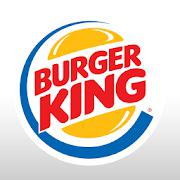

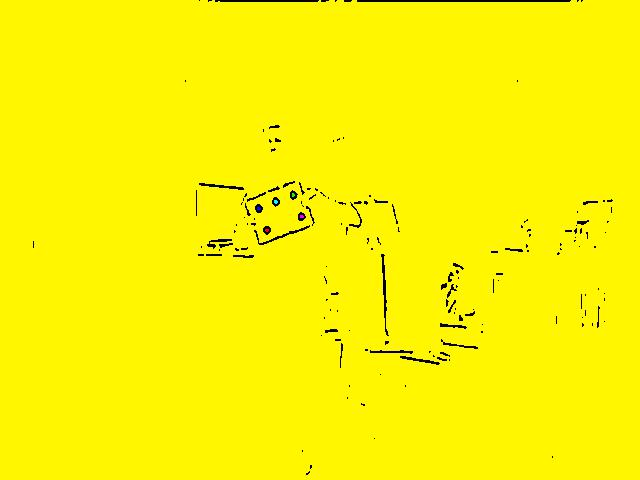

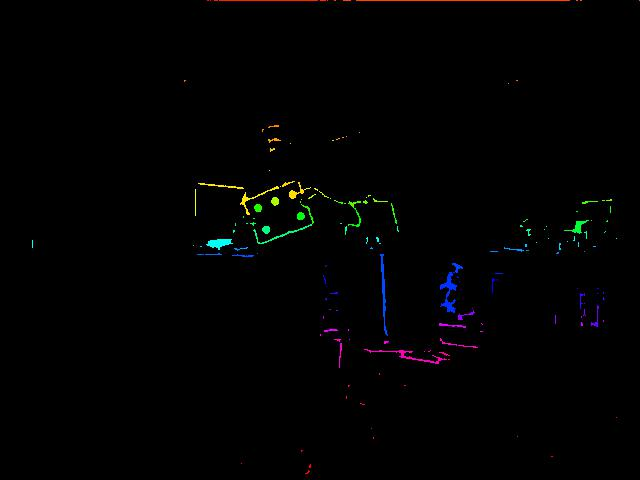

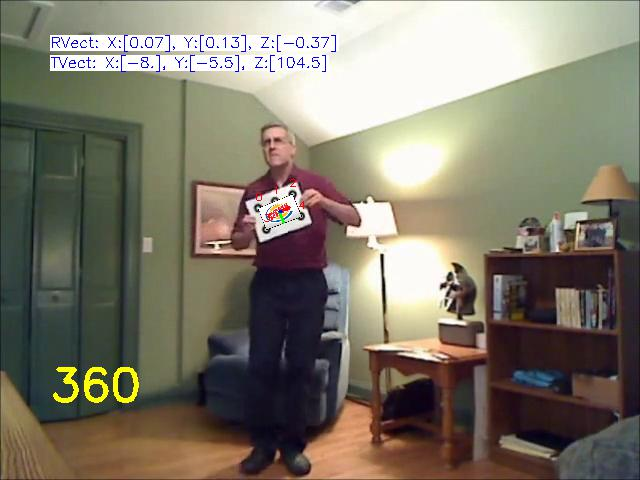

In [10]:
d1 = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)
d3 = IPython.display.display("", display_id=3)
d4 = IPython.display.display("", display_id=4)
d5 = IPython.display.display("", display_id=5)

In [13]:
try:
    video_name = "fiveCCC.mp4"
    cam = cv2.VideoCapture(video_name)
    fps = cam.get(cv2.CAP_PROP_FPS)
    frame = 0
    poseCounter = 0
    total_frames = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))

    src_img = url_to_image(
        "https://play-lh.googleusercontent.com/S3GUKxn95ihjayGjfZcVjx6YMdub723eg1wItYVYZeJya1TMlFPdjPjOWHOJv82VPG7a=s180")
    d1.update(imdisplay(src_img))
    rotated = None

    video_output_name = video_name[0:video_name.find(".")]+"_output"+".mp4"
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    videoWriter = cv2.VideoWriter(filename=video_output_name, fourcc=fourcc, fps=fps,
                              frameSize=(int(cam.get(3)), int(cam.get(4))))

    while True:
        try:
            t1 = time.time()
            got_image, original_img = cam.read() # Try to read in video
            if not got_image: break  # break if no video
            frame += 1
            thresh_img, innerComponents, outerComponents = processFrame(
                original_img)
            pts = findCCCPoints(innerComponents, outerComponents)
            if (len(pts) == 5):
                poseFound, original_img = applyPose(np.array(order_targets(np.array(pts, np.float32)), np.float64), original_img)
                if poseFound: poseCounter += 1

            original_img=cv2.putText(original_img, text=str(frame), org=(50, 400), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                                       fontScale=1.5, color=(0, 255, 255), thickness=3)
            videoWriter.write(original_img)
            cv2.imshow('frame', original_img)
            c = cv2.waitKey(1)
            if c & 0xFF == ord('q'):
                break

            s=f"""<h1>Pose Found Rate: {np.round(100*poseCounter/frame, 4)}%<h3>{int(1/(time.time()-t1))} FPS</h3>"""
            d5.update(IPython.display.HTML(s))
            d4.update(imdisplay(original_img, width=900))
            

        except KeyboardInterrupt:
            break

finally:
    cam.release()
    videoWriter.release()
    cv2.destroyAllWindows()
    print("End of Video")

End of Video
